In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autokeras as ak
import tensorflow as tf
import os
from tensorflow.keras.models import load_model

In [2]:
data = np.load('/work/n1000000_0804_all_flat.npz')
cut_index = np.load('/work/NIO_largerthan1000_index.npy')

In [3]:
tdmodels = []
tmodels = []
dmodels = []
for dirname, _, filenames in os.walk('/work/ML4NO/ML/Regression/models_all/'):
    for i, filename in enumerate(filenames):
        if '0804' in filename:
            if 'theta23,delta' in filename:
                tdmodels.append(load_model(os.path.join(dirname, filename)))
            elif 'theta23' in filename:
                tmodels.append(load_model(os.path.join(dirname, filename)))
            elif 'delta' in filename:
                dmodels.append(load_model(os.path.join(dirname, filename)))

In [4]:
data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune'], data['ve_t2hk'], data['vu_t2hk'], data['vebar_t2hk'], data['vubar_t2hk']])
target = np.column_stack([data['theta23'], data['delta']])
x_test = data_all[900000:]
y_test = target[900000:]

In [5]:
print(len(tdmodels))
print(len(tmodels))
print(len(dmodels))

0
1
1


In [9]:
input_state = 2
target = data['theta23']

x_test = data_all[900000:]
y_test = target[900000:]

In [10]:
for model in tdmodels:
#     print(model.summary())
    print(model.evaluate(x_test, y_test))

In [11]:
x_test = data_all[900000:, cut_index]
y_test = data['theta23'][900000:]

In [13]:
for model in tmodels:
     print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 244)               0         
_________________________________________________________________
normalization (Normalization (None, 244)               489       
_________________________________________________________________
dense (Dense)                (None, 1024)              250880    
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)               

In [6]:
x_test = data_all[900000:]
y_test = data['delta'][900000:]

In [50]:
for model in dmodels:
    print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 244)               0         
_________________________________________________________________
normalization (Normalization (None, 244)               489       
_________________________________________________________________
dense (Dense)                (None, 32)                7840      
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128)              

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow import keras

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import time
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [48]:
input_ve_dune=keras.Input(shape=(50,),name="dune_t2hk")
model.add(BatchNormalization(input_shape=input_shape))
dense1 =layers.Dense(128,name="dense1", activation='relu')(input_ve_dune)
dense2 =layers.Dense(64,name="dense2", activation='relu')(dense1)

output_label =layers.Dense(2, activation='softmax',name="theta23")(dense2)

model_DUT2=keras.Model(inputs=[input_ve_dune], outputs=[output_label],name="model_DUT2")
model_DUT2.compile(loss='binary_crossentropy',
           optimizer="adam",
            metrics=('accuracy'))
model_DUT2.summary()

Model: "model_DUT2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dune_t2hk (InputLayer)       [(None, 50)]              0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               6528      
_________________________________________________________________
dense2 (Dense)               (None, 64)                8256      
_________________________________________________________________
theta23 (Dense)              (None, 2)                 130       
Total params: 14,914
Trainable params: 14,914
Non-trainable params: 0
_________________________________________________________________


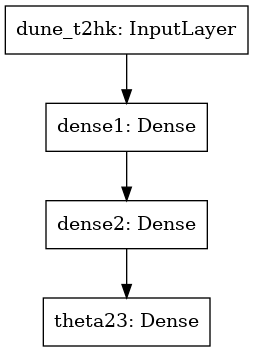

In [49]:
plot_model(model_DUT2, 'theta23.png')

In [52]:
input_shape = (50,)
model = Sequential(name = 'Sequential')
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dense(32, activation='relu', name = 'dense_1'))
model.add(Dense(128, activation='relu', name = 'dense_2'))
model.add(Dense(1, activation='sigmoid', name = 'dense_3'))
model_opt = keras.optimizers.Adadelta()
model.compile(loss="mean_squared_error",
                   optimizer=model_opt,
                   metrics=["mse"])
model.summary()

NameError: name 'BatchNormalization' is not defined